In [1]:
%config Completer.use_jedi = False # for autocomplete suggestions

In [1]:
import pandas as pd
import io
src = ""
df = pd.read_csv("log_trans1x-128_peptide.txt", sep=",")

In [2]:
df

,epoch,batch_idx,data_type,tot_loss,recon_loss,pred_loss,kld_loss,prop_mse_loss,disc_loss,mmd_loss,run_time
0,0,0,train,9.222127,3.990862,5.231265,8.122448e-09,0.0,0,0,1.13029
1,0,0,train,9.303535,3.967851,5.335684,8.113830e-09,0.0,0,0,1.14002
2,0,0,train,9.269600,3.992642,5.276958,8.090906e-09,0.0,0,0,1.15184
3,0,0,train,9.246325,3.988934,5.257391,8.111957e-09,0.0,0,0,1.16368
4,0,1,train,9.183730,3.969117,5.214613,8.063405e-09,0.0,0,0,0.25633
...,...,...,...,...,...,...,...,...,...,...,...
375995,1999,45,train,0.569902,0.448601,0.000001,1.213000e-01,0.0,0,0,0.23268
375996,1999,0,test,0.432838,0.301685,0.010245,1.209087e-01,0.0,0,0,0.07279
375997,1999,0,test,0.423273,0.300126,0.000098,1.230488e-01,0.0,0,0,0.07227
375998,1999,0,test,0.429452,0.298136,0.010717,1.206001e-01,0.0,0,0,0.08386


In [3]:
#separate the train and test data
train_df = df.loc[df['data_type'] == "train"]
test_df = df.loc[df['data_type'] == "test"]

In [16]:
#separate the 4 gpu's from each other
train_df_0 = train_df[::4]
train_df_1 = train_df[1::4]
train_df_2 = train_df[2::4]
train_df_3 = train_df[3::4]

# train_df_0 = train_df[:(4*45)*300:4]
# train_df_1 = train_df[1:(4*45)*300:4]
# train_df_2 = train_df[2:(4*45)*300:4]
# train_df_3 = train_df[3:(4*45)*300:4]
test_df_0 = test_df[:(4*45)*4:4]
test_df_1 = test_df[1:(4*45)*4:4]
test_df_2 = test_df[2:(4*45)*4:4]
test_df_3 = test_df[3:(4*45)*4:4]

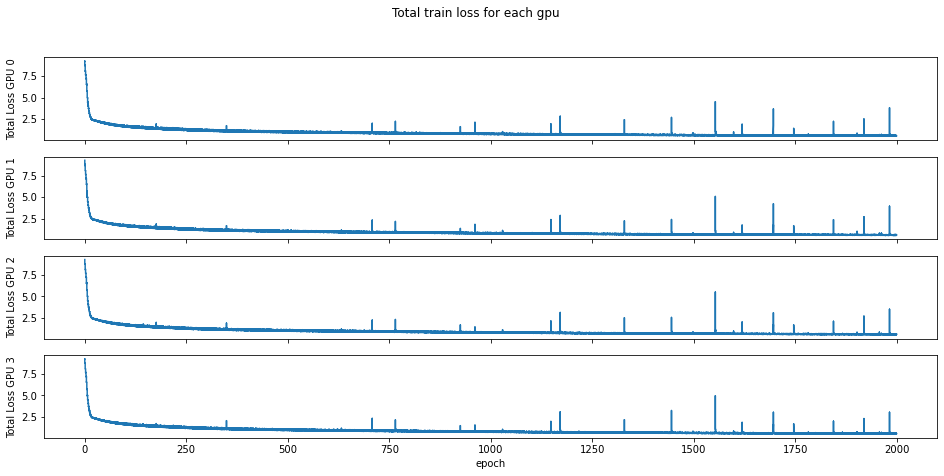

In [17]:
import matplotlib.pyplot as plt
x1= train_df_0['epoch']
y1= train_df_0['tot_loss']

x2= train_df_1['epoch']
y2= train_df_1['tot_loss']

x3= train_df_2['epoch']
y3= train_df_2['tot_loss']

x4= train_df_3['epoch']
y4= train_df_3['tot_loss']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True,figsize=(16,7))
fig.suptitle('Total train loss for each gpu')

ax1.plot(x1, y1)
ax1.set_ylabel('Total Loss GPU 0')

ax2.plot(x2, y2)
ax2.set_ylabel('Total Loss GPU 1')

ax3.plot(x3, y3)
ax3.set_ylabel('Total Loss GPU 2')

ax4.plot(x4, y4)
ax4.set_xlabel('epoch')
ax4.set_ylabel('Total Loss GPU 3')

plt.show()

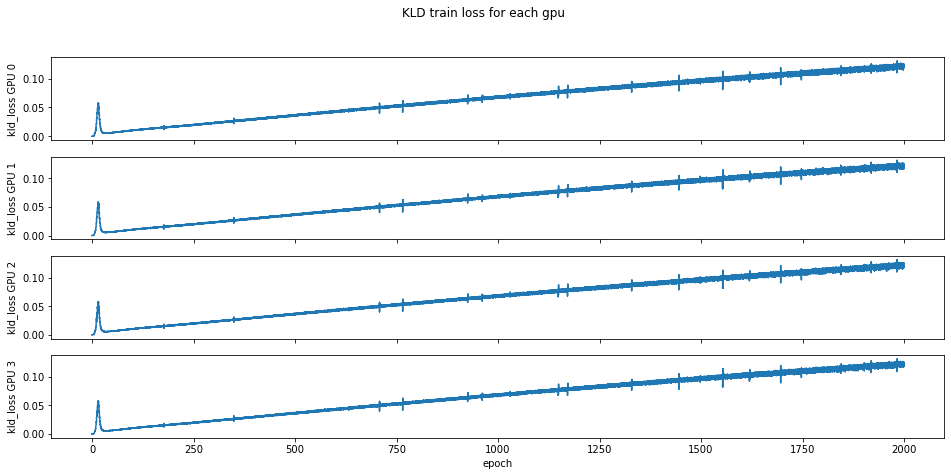

In [18]:
import matplotlib.pyplot as plt
x1= train_df_0['epoch']
y1= train_df_0['kld_loss']

x2= train_df_1['epoch']
y2= train_df_1['kld_loss']

x3= train_df_2['epoch']
y3= train_df_2['kld_loss']

x4= train_df_3['epoch']
y4= train_df_3['kld_loss']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True,figsize=(16,7))
fig.suptitle('KLD train loss for each gpu')

ax1.plot(x1, y1)
ax1.set_ylabel('kld_loss GPU 0')

ax2.plot(x2, y2)
ax2.set_ylabel('kld_loss GPU 1')

ax3.plot(x3, y3)
ax3.set_ylabel('kld_loss GPU 2')

ax4.plot(x4, y4)
ax4.set_xlabel('epoch')
ax4.set_ylabel('kld_loss GPU 3')

plt.show()

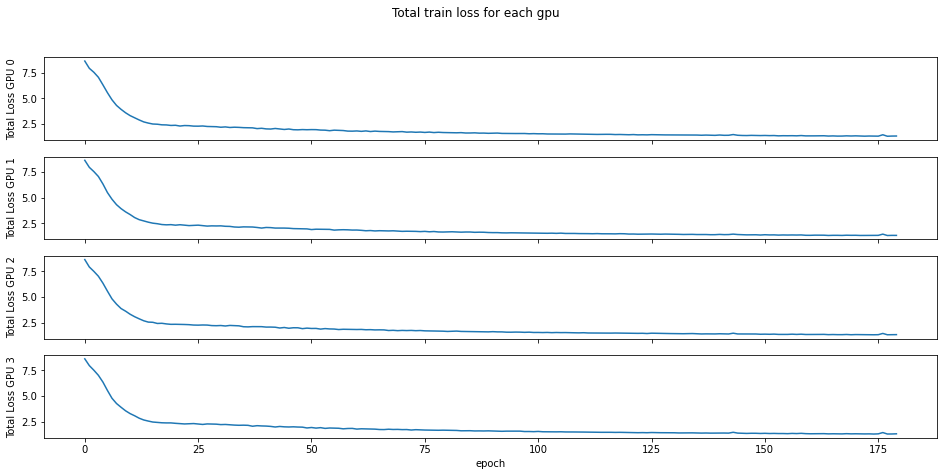

In [19]:
import matplotlib.pyplot as plt
x1= test_df_0['epoch']
y1= test_df_0['tot_loss']

x2= test_df_1['epoch']
y2= test_df_1['tot_loss']

x3= test_df_2['epoch']
y3= test_df_2['tot_loss']

x4= test_df_3['epoch']
y4= test_df_3['tot_loss']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True,figsize=(16,7))
fig.suptitle('Total test loss for each gpu')

ax1.plot(x1, y1)
ax1.set_ylabel('Total Loss GPU 0')

ax2.plot(x2, y2)
ax2.set_ylabel('Total Loss GPU 1')

ax3.plot(x3, y3)
ax3.set_ylabel('Total Loss GPU 2')

ax4.plot(x4, y4)
ax4.set_xlabel('epoch')
ax4.set_ylabel('Total Loss GPU 3')

plt.show()

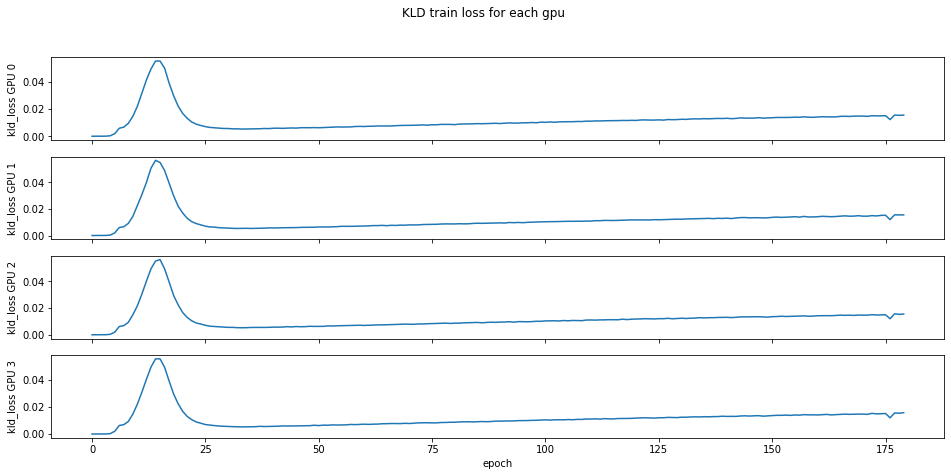

In [20]:
import matplotlib.pyplot as plt
x1= test_df_0['epoch']
y1= test_df_0['kld_loss']

x2= test_df_1['epoch']
y2= test_df_1['kld_loss']

x3= test_df_2['epoch']
y3= test_df_2['kld_loss']

x4= test_df_3['epoch']
y4= test_df_3['kld_loss']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True,figsize=(16,7))
fig.suptitle('KLD train loss for each gpu')

ax1.plot(x1, y1)
ax1.set_ylabel('kld_loss GPU 0')

ax2.plot(x2, y2)
ax2.set_ylabel('kld_loss GPU 1')

ax3.plot(x3, y3)
ax3.set_ylabel('kld_loss GPU 2')

ax4.plot(x4, y4)
ax4.set_xlabel('epoch')
ax4.set_ylabel('kld_loss GPU 3')

plt.show()